KNN klasyfikuje na podstawie najblizszego sąsiedztwa. Wartość zmiennej wyjściowej ocenia się na podstawie K punktów wokół. Dla algorytmu liczba K oznacza ilość punktów, które nalezy brać pod uwagę podczas klasyfikacji. 

### Metody wybory wartości K
Aby wybrać odpowiednią wartość K mozna uzyc następujących metod:
1. Cross-Validation - w tym przypadku nalezy podzielić dane na K podzbioriów i trenować na nich model, a następnie testować go na pozostałych podzbiorach. Nalezy to powtórzyć dla kazdego podzbioru.

2. Elbow Method - nalezy narysować wykres z dokładnością modelu dla róznych wartości K. Im wyzsza wartość tym dokładność powinna wzrastać, poszukiwana wartość K to moment na wykresie, w którym wzrost dokładności przestaje być zauwazalny.

3. Nieparzyste - dodatkowo zaleca się wybierać nieparzyste K, aby uniknąć remisów przy określaniu klasy większościowej.

### Metryki odległości
Wyrózniamy trzy metryki odległości podczas implementacji KNN:
1. Odległość euklidesowa - najkrótsza odległość między dwoma punktami w przestrzeni. 

2. Odległość Manhattan - suma odległości poziomych i pionowych pomiędzy dwoma punktami.

3. Odległość Minkowskiego - połączenie metod, w ogólnych przypadkach uzywana jest euklidesowa, a w specjalnych przypadkach Manhattan.

We wstępnej implementacji uzyta zostanie euklidesowa.

In [38]:
#importy
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [39]:
#wczytywanie danych
X_train = np.loadtxt("train/X_train.txt")
y_train = np.loadtxt("train/y_train.txt", dtype=int)

X_test = np.loadtxt("test/X_test.txt")
y_test = np.loadtxt("test/y_test.txt", dtype=int)

In [40]:
#dokladnosc
k_values = list(range(1, 16))
accuracies = []

In [41]:
#trenowanie dla roznych wartosci k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

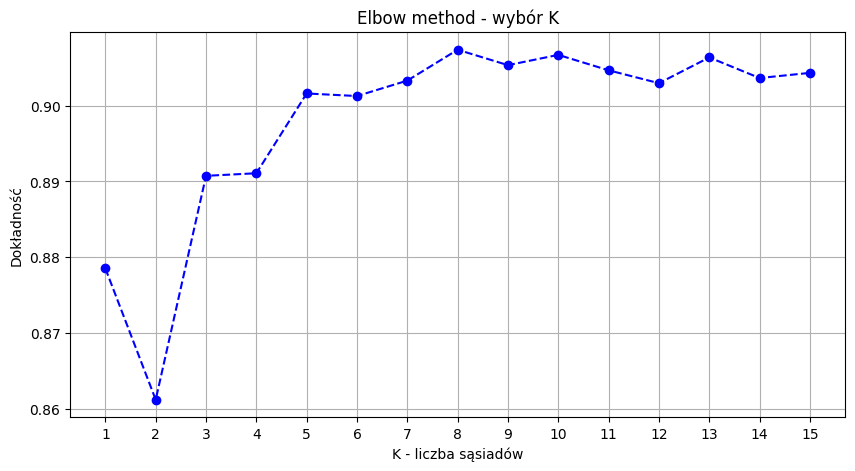

In [42]:
# wykres elbow method
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("K - liczba sąsiadów")
plt.ylabel("Dokładność")
plt.title("Elbow method - wybór K")
plt.xticks(k_values)
plt.grid()
plt.show()

In [43]:
#mapowanie etykiet
activity_labels = {}
with open("activity_labels.txt") as f:
    for line in f:
        key, value = line.split()
        activity_labels[int(key)] = value

In [44]:
#dodawanie etykiet
y_test_text = [activity_labels[label] for label in y_test]
y_pred_text = [activity_labels[label] for label in y_pred]

print("Prawdziwe:", y_test_text[10:100])
print("Predykcja:", y_pred_text[10:100])

Prawdziwe: ['STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING']
P